In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ml-1m.zip'

Archive:  /content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from matplotlib import pyplot as plt 
from operator import itemgetter
import os
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
with open('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/BPR/df.pickle', 'rb') as handle:
  df = pickle.load(handle)
with open('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/BPR/users.pickle', 'rb') as handle:
  users = pickle.load(handle)
with open('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/BPR/movies.pickle', 'rb') as handle:
  movies = pickle.load(handle)

df_movies = pd.read_csv(os.path.join(os.getcwd(),'ml-1m','movies.dat'), 
                 sep=r':{2,}',
                 usecols=[0,1,2],
                 names=['movieId', 'title', 'genres'],
                 engine='python')

In [ ]:
def get_movie_title(movieIndex):
  movieId = movieIndexToID[movieIndex]
  return df_movies[(df_movies["movieId"] == movieId)]["title"].values[0]

movieIndexToID = {i: c for (i, c) in enumerate(movies)}
print(get_movie_title(3700))

Get Carter (1971)


In [ ]:
print(len(users))
print(len(movies))

6040
3706


Plot the rating distribution:

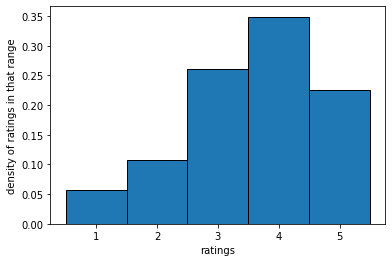

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = df['rating'].hist(bins = [0.5, 1.5, 2.5,3.5,4.5,5.5], ec='black', density = True)
plt.grid(None)
plt.xlabel("ratings")
plt.ylabel("density of ratings in that range")
plt.savefig('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ExploratoryData/rating_distribution')
plt.show()
plt.clf()

Amount of ratings submitted per user

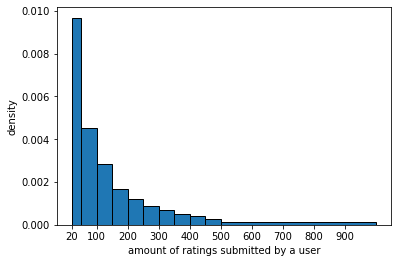

<Figure size 432x288 with 0 Axes>

In [ ]:
counts = df['userId'].value_counts().values
plt.hist(counts, bins = [20,50,100,150,200,250,300,350,400,450,500,1000], ec='black', density = True)
plt.xlabel("amount of ratings submitted by a user")
plt.ylabel("density")
plt.xticks(np.concatenate((np.array([20]), np.arange(100, 1000, step=100)) ) )
plt.savefig('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ExploratoryData/rating_per_user')
plt.show()
plt.clf()

Analysis of the amount of corated movies:

corated = movie X was rated by user A and user B

In [ ]:
def find_common_userRating(movie1, movie2):
    #only compare similarities for users that have rated both movies
    df1 = df[(df['movieId'] == movie1)]
    df2 = df[(df['movieId'] == movie2)]
  
    merged_inner = pd.merge(left=df1, right=df2, on='userId')
    return len(merged_inner)

def count_corated(start, end):
    corated_movies = np.zeros((len(movies), len(movies)))
    for i in range(start, min(len(movies), end)):
        print("counting corated users for index", i)
        for j in range(i+1,len(movies)):
            common = find_common_userRating(i, j)
            corated_movies[i][j] = common
            corated_movies[j][i] = common

    return corated_movies


In [ ]:
matrix = count_corated(0,3706)

In [ ]:
corated_vals = np.array([])

for i in range(len(matrix)):
  corated_vals = np.concatenate((corated_vals, np.array(matrix[i][i+1:])))

Plot the corated counts

In [ ]:
# print(np.mean(corated_vals))
# print(np.median(corated_vals))

density = np.histogram(corated_vals, bins = [0,1,5,10,20,30,40,50,100], density=True)

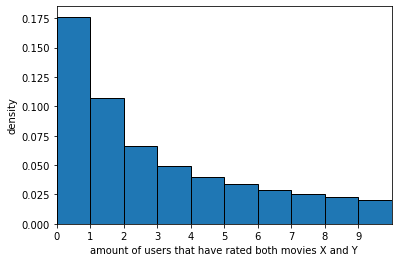

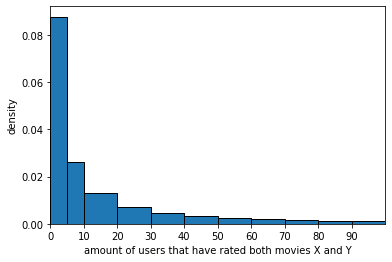

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.hist(corated_vals, bins =[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,4000], ec='black', density=True)
plt.xlabel("amount of users that have rated both movies X and Y")
plt.ylabel("density")
plt.xlim(0, 10)
plt.xticks(np.arange(0, 10, step=1))
plt.savefig('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ExploratoryData/coratedZoomed')
plt.show()
plt.clf()

plt.hist(corated_vals, bins =[0,5,10,20,30,40,50,60,70,80,90,100,4000], ec='black', density=True)
plt.xlabel("amount of users that have rated both movies X and Y")
plt.ylabel("density")
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=10))
plt.savefig('/content/drive/My Drive/Gohlke_ExplainableRecommendation/files/ExploratoryData/corated')
plt.show()
plt.clf()